# Example notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=16)

import ps_toolkit.hmf as hmf

Loaded PS module.



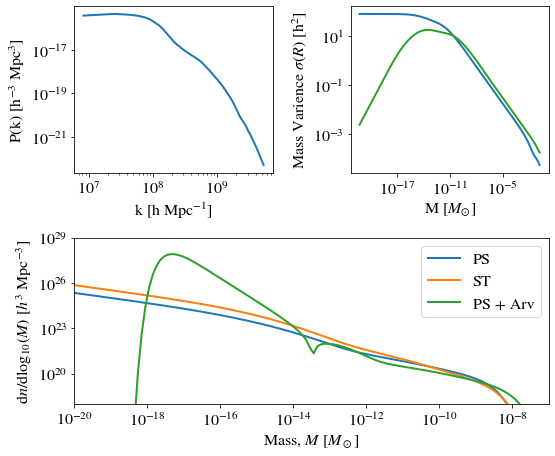

In [13]:
# load power-spectrum
k, P, _, _= np.loadtxt("PS.dat").T
pspec_lin = [P, k]

# Press-Schechter fitting function
HMF_PS, M, f_PS, sigma, _ = hmf.PS_HMF(P, k, z=99, mode = 'PS') 

# Sheth-Torman fitting function
HMF_ST, M, f_ST, sigma, _ = hmf.PS_HMF(P, k, z=99, mode = 'ST')

# Press-Schechter fitting function + Arvanitaki window function
HMF_Arv, M, f_Arv, sigma_Arv, _ = hmf.PS_HMF(P, k, z=99, mode = 'PS', filter_mode = "Arvanitaki") 



# Plot powerspectrum
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(221)
ax1.loglog(k, P, '-',lw=2)
ax1.set_xlabel("k [h Mpc$^{-1}$]");
ax1.set_ylabel("P(k) [h$^{-3}$ Mpc$^{3}$]");

# Plot Mass Varience
ax2 = fig.add_subplot(222)
ax2.loglog(M, sigma,'-',linewidth=2)
ax2.loglog(M, sigma_Arv,'-',linewidth=2, color = "tab:green")
ax2.set_ylabel("Mass Varience $\sigma(R)$ [h$^2$]");
ax2.set_xlabel("M [$M_{\odot}$]");
#ax2.set_xlim([1e-21, 1e-7])
plt.tight_layout()

# Plot HMF
ax3 = fig.add_subplot(212)
ax3.loglog(M, HMF_PS,'-',linewidth=2, label = "PS")
ax3.loglog(M, HMF_ST,'-',linewidth=2, label = "ST")
ax3.loglog(M, HMF_Arv,'-',linewidth=2, label = "PS + Arv")
ax3.set_xlabel(r"Mass, $M$ [$M_\odot$]");
ax3.set_ylabel(r"$\mathrm{d}n/\mathrm{d }\log_{10}(M)$ [$h^3$ Mpc$^{-3}$]");
ax3.set_ylim([1e18, 1e29])
ax3.set_xlim([1e-20, 1e-7])
plt.legend()
plt.savefig("example.pdf", bbox_inches = "tight")